In [1]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [2]:
df=pd.read_csv('afghansfinal_lemmatized.csv')

In [3]:
df1=pd.read_csv('annotated_tweets_afghans_lemmatized.csv')

In [4]:
df

,Unnamed: 0,date,Tweet,id
0,0,2021-08-23 14:37:01+00:00,sn çelik birgün çıkmak kür emeklilikteyasatakı...,1.429815e+18
1,1,2021-12-22 04:17:12+00:00,suriye esed gidermek suriye suriye gönderilirs...,1.473508e+18
2,2,2021-11-02 20:22:26+00:00,suriye afgan zaman beri türkiye cumhuriyet vat...,1.455631e+18
3,3,2021-08-20 18:51:22+00:00,afgan lunapark yakmışlaraqp li orman yakmak va...,1.428792e+18
4,4,2021-08-16 22:23:20+00:00,galatasaray türkiye derken doğru söylüyorlarmı...,1.427396e+18
...,...,...,...,...
30547,30547,2021-08-17 22:48:00+00:00,türkiye avrupa geçmek hayalî kuran milyonlarca...,1.427764e+18
30548,30548,2021-08-17 11:43:03+00:00,afgan giz çekip tıktoka at bir desen bir kepaz...,1.427597e+18
30549,30549,2022-01-10 07:18:40+00:00,avrupa halk huzur güvenlik baş sarmak suriye a...,1.480439e+18
30550,30550,2021-08-25 06:08:14+00:00,özür rağmen yalan kararlıları̇ngiliz basın yem...,1.430412e+18


In [5]:
vector=CountVectorizer()

In [6]:
X=df['Tweet']

In [7]:
X_train=df1['Tweet']

In [8]:
X_train=vector.fit_transform(X_train)

In [9]:
X_pred=df['Tweet']

In [10]:
X_pred=vector.transform(X_pred)

In [11]:
ytrain=df1['Sentiment']

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, ytrain)
ypred=log_reg.predict(X_pred)


In [13]:
ypred

array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [14]:
df2 = pd.concat([X.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [15]:
df2['PredictedSentiment'].value_counts()

Neutral     20865
Negative     9342
Positive      345
Name: PredictedSentiment, dtype: int64

In [54]:
df2

,Tweet,PredictedSentiment
0,sn çelik birgün çıkmak kür emeklilikteyasatakı...,Neutral
1,suriye esed gidermek suriye suriye gönderilirs...,Neutral
2,suriye afgan zaman beri türkiye cumhuriyet vat...,Neutral
3,afgan lunapark yakmışlaraqp li orman yakmak va...,Neutral
4,galatasaray türkiye derken doğru söylüyorlarmı...,Neutral
...,...,...
30547,türkiye avrupa geçmek hayalî kuran milyonlarca...,Neutral
30548,afgan giz çekip tıktoka at bir desen bir kepaz...,Neutral
30549,avrupa halk huzur güvenlik baş sarmak suriye a...,Neutral
30550,özür rağmen yalan kararlıları̇ngiliz basın yem...,Neutral


In [16]:
df2.to_csv('predictedsentiment_afghans_logistic.csv')

In [17]:
all_tweets_afghans=pd.read_excel('afghansfinaldataset.xlsx')

In [18]:
all_tweets_afghans

,date,Tweet,id
0,2021-08-23 14:37:01+00:00,@Akparti @omerrcelik Sn celik birgun cik su ku...,1.429815e+18
1,2021-12-22 04:17:12+00:00,@siyamusta61SLx Suriyede esed giderse Suriyeli...,1.473508e+18
2,2021-11-02 20:22:26+00:00,@AjansMuhbir Suriyeli ve Afganlar ne zamandan ...,1.455631e+18
3,2021-08-20 18:51:22+00:00,"Afganlar lunaparkı yakmışlar,aqp lilerde orman...",1.428792e+18
4,2021-08-16 22:23:20+00:00,"""Galatasaray Türkiye'dir"" derken doğru söylüyo...",1.427396e+18
...,...,...,...
30547,2021-08-17 22:48:00+00:00,@Emmoglu_35 Türkiyeden Avrupa'ya geçme hayali ...,1.427764e+18
30548,2021-08-17 11:43:03+00:00,@zeybikhere Afganlar gibi gizlice çekip tiktok...,1.427597e+18
30549,2022-01-10 07:18:40+00:00,Avrupa halklarının huzuru ve güvenliği için ba...,1.480439e+18
30550,2021-08-25 06:08:14+00:00,@herkesicinCHP ÖZÜRE RAĞMEN YALANDA 'KARAR'LIL...,1.430412e+18


In [19]:
df5 = pd.concat([all_tweets_afghans.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [26]:
df5['PredictedSentiment'].value_counts()

Neutral     20865
Negative     9342
Positive      345
Name: PredictedSentiment, dtype: int64

In [21]:
df5.to_csv('afghanswithpredictedsentimentlogistic.csv')

In [22]:
df5.to_excel('afghanswithpredictedsentimentlogistic.xlsx')

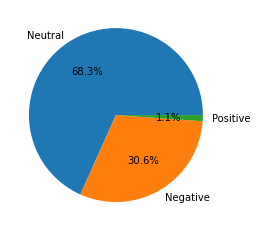

In [25]:
plt.pie(df5['PredictedSentiment'].value_counts(),labels=['Neutral','Negative','Positive'],autopct='%1.1f%%')
plt.show()

In [24]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt